In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
cuni=pd.read_csv('finaldata.csv')
cbi=pd.read_csv('bidf.csv')
cub=pd.read_csv('ub_df.csv')
tfuni=pd.read_csv('tfuni.csv')
tfbi=pd.read_csv('tfbii.csv')
tfub=pd.read_csv('tf_ui_bi.csv')

In [3]:
X_cuni=cuni.drop(['category','category_label'],axis=1)
X_cbi=cbi.drop(['category','category_label'],axis=1)
X_cub=cub.drop(['category','category_label'],axis=1)
X_tfuni=tfuni.drop(['category','category_label'],axis=1)
X_tfbi=tfbi.drop(['category','category_label'],axis=1)
X_tfub=tfub.drop(['category','category_label'],axis=1)

In [4]:
target=cuni[['category_label']]

In [5]:
cluster_df=pd.DataFrame(cuni['category_label'].copy())

In [6]:
cluster_df

,category_label
0,2
1,2
2,2
3,2
4,2
...,...
72,4
73,4
74,4
75,0


In [7]:
def clustering(feature,df_name):
    algor=KMeans(n_clusters=5).fit(feature)
    k1=algor.labels_.tolist()
    cluster_df[df_name]=k1

In [8]:
clustering(X_cbi,'cbi')
clustering(X_cub,'cub')
clustering(X_cuni,'cuni')
clustering(X_tfbi,'tfbi')
clustering(X_tfub,'tfub')
clustering(X_tfuni,'tfuni')

In [9]:
cluster_df

,category_label,cbi,cub,cuni,tfbi,tfub,tfuni
0,2,3,0,1,4,3,3
1,2,3,0,1,4,3,3
2,2,3,0,1,4,3,3
3,2,3,0,1,1,4,3
4,2,3,0,1,4,3,2
...,...,...,...,...,...,...,...
72,4,3,0,4,1,0,1
73,4,3,0,1,1,0,1
74,4,3,0,4,1,0,1
75,0,3,0,1,3,3,3


In [10]:
for i in cluster_df.columns:
    print(cluster_df[i].value_counts())

4    21
2    20
1    20
3    14
0     2
Name: category_label, dtype: int64
3    71
4     3
0     1
1     1
2     1
Name: cbi, dtype: int64
0    62
2    11
1     2
4     1
3     1
Name: cub, dtype: int64
1    49
4    18
2     5
3     4
0     1
Name: cuni, dtype: int64
1    24
4    19
0    14
2    13
3     7
Name: tfbi, dtype: int64
3    23
0    21
2    14
1    13
4     6
Name: tfub, dtype: int64
3    21
1    21
2    15
0    11
4     9
Name: tfuni, dtype: int64


In [11]:
cluster_df['tfuni'].value_counts()

3    21
1    21
2    15
0    11
4     9
Name: tfuni, dtype: int64

In [12]:
cluster_df['category_label'].value_counts()

4    21
2    20
1    20
3    14
0     2
Name: category_label, dtype: int64

In [13]:
index_columns = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1score',
                'test_accuracy', 'test_precision', 'test_recall', 'test_f1score']
result=pd.DataFrame(index=index_columns)

In [14]:
result

""
train_accuracy
train_precision
train_recall
train_f1score
test_accuracy
test_precision
test_recall
test_f1score


### Model Building

In [15]:
def model_building(model,features,model_name):
    '''model,features,model name'''
    
    x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
    
    model1=model.fit(x_train,y_train)
    train_predict=model1.predict(x_train)
    train_conf=confusion_matrix(y_train,train_predict)
    train_classfi=classification_report(y_train,train_predict)
    train_accuracy=accuracy_score(y_train,train_predict)
    train_precision=precision_score(y_train,train_predict,average='macro')
    train_recall=recall_score(y_train,train_predict,average='macro')
    train_f1score=f1_score(y_train,train_predict,average='macro')
    
    test_predict=model1.predict(x_test)
    test_conf=confusion_matrix(y_test,test_predict)
    test_classfi=classification_report(y_test,test_predict)
    test_accuracy=accuracy_score(y_test,test_predict)
    test_precision=precision_score(y_test,test_predict,average='macro')
    test_recall=recall_score(y_test,test_predict,average='macro')
    test_f1score=f1_score(y_test,test_predict,average='macro')
    
    result[model_name]=train_accuracy,train_precision,train_recall,train_f1score,test_accuracy,test_precision,test_recall,test_f1score
    
    plt.figure(figsize=(5,3))
    sns.heatmap(test_conf,annot=True)
    plt.show()
    print('-'*30,'>','Train Classification Report','<','-'*30)
    print(train_classfi)
    print()
    print('-'*30,'>','Test Classification Report','<','-'*30)
    print(test_classfi)
    

In [16]:
def tuning(model,params,features):
    '''model,params,features'''
    grid=GridSearchCV(model,params,n_jobs=-1)
    x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
    grid.fit(x_train,y_train)
    bestp=grid.best_params_
    return bestp

### Logistic Regression

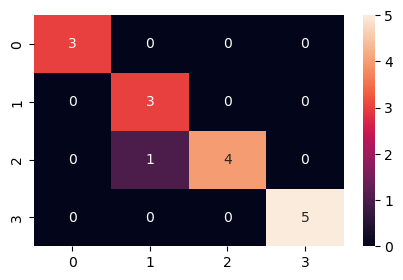

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5

    accuracy                           0.94        

In [17]:
model_building(LogisticRegression(),X_cuni,'Logistic_regression_cuni')

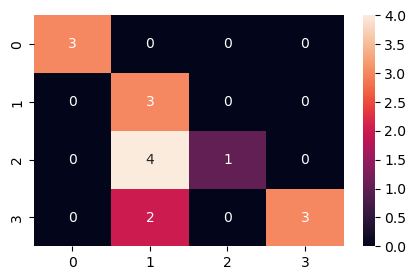

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.33      1.00      0.50         3
           3       1.00      0.20      0.33         5
           4       1.00      0.60      0.75         5

    accuracy                           0.62        

In [18]:
model_building(LogisticRegression(),X_cbi,'Logistic_regression_cbi')

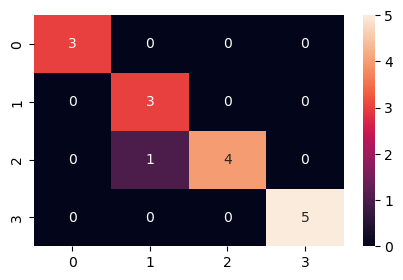

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5

    accuracy                           0.94        

In [19]:
model_building(LogisticRegression(),X_cub,'Logistic_regression_cub')

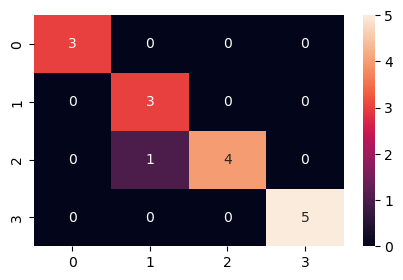

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           0.97        61
   macro avg       0.78      0.80      0.79        61
weighted avg       0.94      0.97      0.95        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5

    accuracy                           0.94        

In [20]:
model_building(LogisticRegression(),X_tfuni,'Logistic_regression_tfuni')

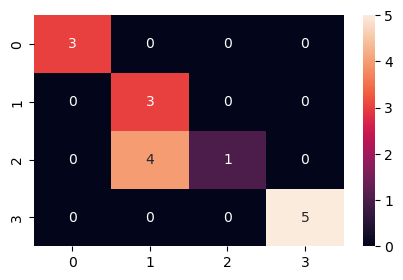

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           0.97        61
   macro avg       0.78      0.80      0.79        61
weighted avg       0.94      0.97      0.95        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.43      1.00      0.60         3
           3       1.00      0.20      0.33         5
           4       1.00      1.00      1.00         5

    accuracy                           0.75        

In [21]:
model_building(LogisticRegression(),X_tfbi,'Logistic_regression_tfbi')

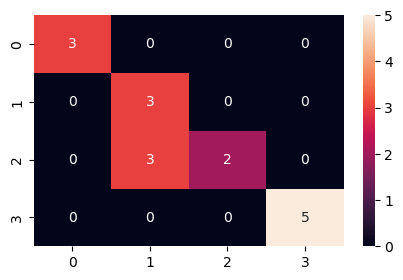

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           0.97        61
   macro avg       0.78      0.80      0.79        61
weighted avg       0.94      0.97      0.95        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.50      1.00      0.67         3
           3       1.00      0.40      0.57         5
           4       1.00      1.00      1.00         5

    accuracy                           0.81        

In [22]:
model_building(LogisticRegression(),X_tfub,'Logistic_regression_tfub')

### Decision Tree

In [23]:
#params={'max_depth':[2,4,8,10,None],'criterion':['entropy','gini'],'max_features':[0.25,0.35,0.5,0.75,1.0,None],'min_samples_split':[2,3,4,5,6]}
#tuning(DecisionTreeClassifier(),params,X_cuni)

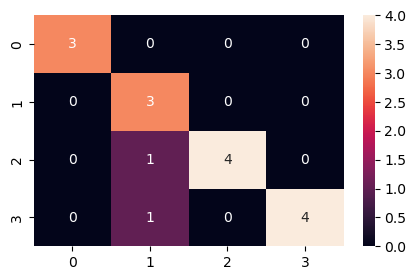

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      0.80      0.89         5
           4       1.00      0.80      0.89         5

    accuracy                           0.88        

In [24]:
model_building(DecisionTreeClassifier(criterion='gini',max_depth=None,max_features=0.35,min_samples_split=2),X_cuni,'Dtree_cuni')

In [25]:
#params={'max_depth':[2,4,8,10,None],'criterion':['entropy','gini'],'max_features':[0.25,0.35,0.5,0.75,1.0,None],'min_samples_split':[2,3,4,5,6]}
#tuning(DecisionTreeClassifier(),params,X_cbi)

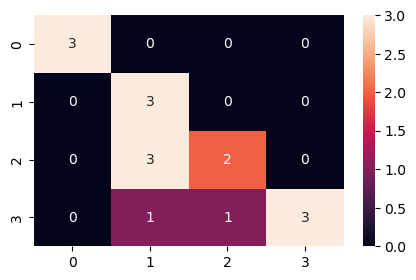

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.43      1.00      0.60         3
           3       0.67      0.40      0.50         5
           4       1.00      0.60      0.75         5

    accuracy                           0.69        

In [26]:
model_building(DecisionTreeClassifier(criterion="gini",max_depth=None,max_features=1.0,min_samples_split=2),X_cbi,'Dtree_cbi')

In [27]:
#params={'max_depth':[2,4,8,10,None],'criterion':['entropy','gini'],'max_features':[0.25,0.35,0.5,0.75,1.0,None],'min_samples_split':[2,3,4,5,6]}
#tuning(DecisionTreeClassifier(),params,X_cub)

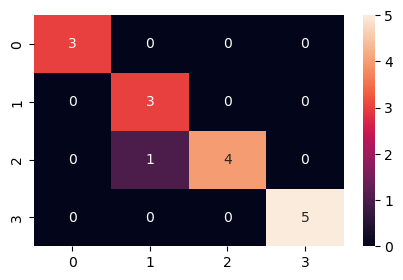

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5

    accuracy                           0.94        

In [28]:
model_building(DecisionTreeClassifier(criterion='gini',max_depth=8,max_features=1.0,min_samples_split=2),X_cub,'Dtree_cub')

In [29]:
#params={'max_depth':[2,4,8,10,None],'criterion':['entropy','gini'],'max_features':[0.25,0.35,0.5,0.75,1.0,None],'min_samples_split':[2,3,4,5,6]}
#tuning(DecisionTreeClassifier(),params,X_tfuni)

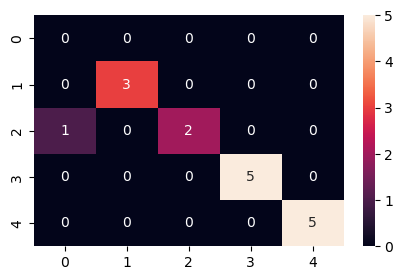

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         3
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         

In [30]:
model_building(DecisionTreeClassifier(criterion='gini',max_depth=8,max_features=0.75,min_samples_split=2),X_tfuni,"Dtree_tfuni")

In [31]:
#params={'max_depth':[2,4,8,10,None],'criterion':['entropy','gini'],'max_features':[0.25,0.35,0.5,0.75,1.0,None],'min_samples_split':[2,3,4,5,6]}
#tuning(DecisionTreeClassifier(),params,X_tfbi)

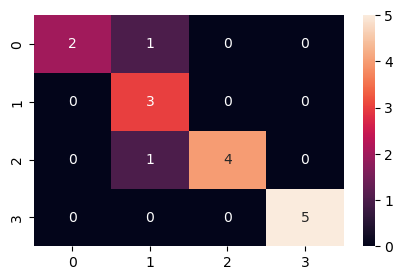

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.60      1.00      0.75         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5

    accuracy                           0.88        

In [32]:
model_building(DecisionTreeClassifier(criterion='entropy',max_depth=8,max_features=0.75,min_samples_split=3),X_tfbi,'Dtree_tfbi')

In [33]:
#params={'max_depth':[2,4,8,10,None],'criterion':['entropy','gini'],'max_features':[0.25,0.35,0.5,0.75,1.0,None],'min_samples_split':[2,3,4,5,6]}
#tuning(DecisionTreeClassifier(),params,X_tfub)

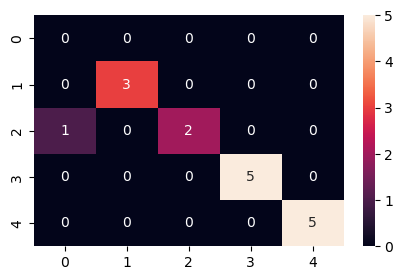

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         3
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         

In [34]:
model_building(DecisionTreeClassifier(criterion='gini',max_depth=10,max_features=None,min_samples_split=3),X_tfub,'Dtree_tfub')

### Support Vector Machine

In [35]:
params={'kernel':['rbf','linear','poly','sigmoid'],'gamma':[0.1,0.4,0.6],'C':np.arange(1,5)}

In [36]:
#tuning(SVC(),params,X_cuni)

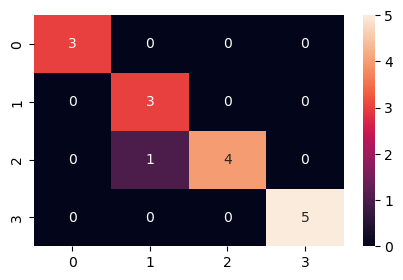

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5

    accuracy                           0.94        

In [37]:
model_building(SVC(C=1,gamma=0.1,kernel='linear'),X_cuni,'SVC_cuni')

In [38]:
#tuning(SVC(),params,X_cbi)

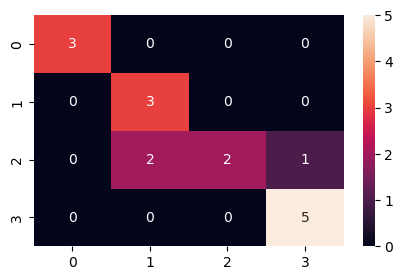

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.89      1.00      0.94        17
           2       0.85      1.00      0.92        17
           3       0.80      0.89      0.84         9
           4       1.00      0.75      0.86        16

    accuracy                           0.89        61
   macro avg       0.71      0.73      0.71        61
weighted avg       0.87      0.89      0.87        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      0.40      0.57         5
           4       0.83      1.00      0.91         5

    accuracy                           0.81        

In [39]:
model_building(SVC(C=1,gamma=0.4,kernel='sigmoid'),X_cbi,'SVC_cbi')

In [40]:
#tuning(SVC(),params,X_cub)

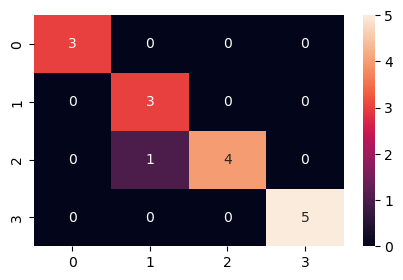

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5

    accuracy                           0.94        

In [41]:
model_building(SVC(C=1,gamma=0.1,kernel='linear'),X_cub,'SVC_cub')

In [42]:
#tuning(SVC(),params,X_tfuni)

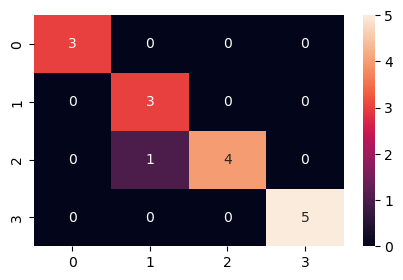

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5

    accuracy                           0.94        

In [43]:
model_building(SVC(C=1,gamma=0.1,kernel='linear'),X_tfuni,'SVC_tfuni')

In [44]:
#tuning(SVC(),params,X_tfbi)

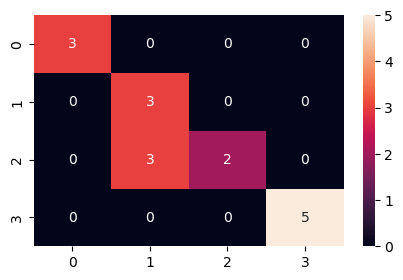

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.50      1.00      0.67         3
           3       1.00      0.40      0.57         5
           4       1.00      1.00      1.00         5

    accuracy                           0.81        

In [45]:
model_building(SVC(C=3,gamma=0.6,kernel='sigmoid'),X_tfbi,'SVC_tfbi')

In [46]:
#tuning(SVC(),params,X_tfub)

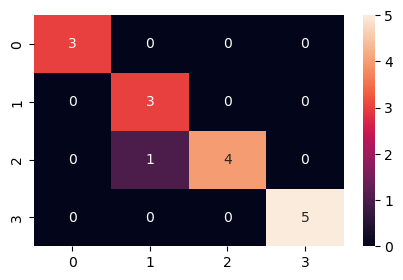

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5

    accuracy                           0.94        

In [47]:
model_building(SVC(C=2,gamma=0.1,kernel='linear'),X_tfub,'SVC_tfub')

### Random Forest

In [48]:
params={'n_estimators':[50,100,150],'max_depth':[2,4,8,10,None],'criterion':['entropy','gini'],'max_features':[0.25,0.35,0.5,0.75,1.0,None,'sqrt','log2'],'min_samples_split':[2,3,4,5,6]}

In [49]:
#tuning(RandomForestClassifier(),params,X_cuni)

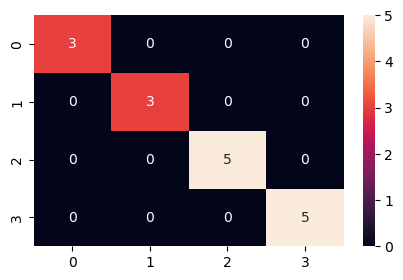

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [50]:
model_building(RandomForestClassifier(criterion='entropy',max_depth=10,max_features=0.25,min_samples_split=5,n_estimators=100),X_cuni,'Rforest_cuni')

In [51]:
#tuning(RandomForestClassifier(),params,X_cbi)

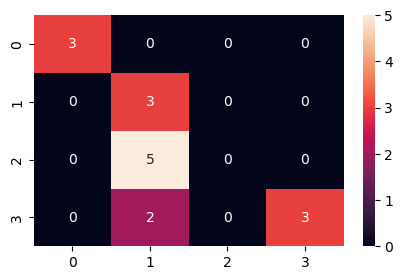

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.82      0.90        17
           2       0.50      1.00      0.67        17
           3       0.00      0.00      0.00         9
           4       1.00      0.81      0.90        16

    accuracy                           0.72        61
   macro avg       0.50      0.53      0.49        61
weighted avg       0.68      0.72      0.67        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.30      1.00      0.46         3
           3       0.00      0.00      0.00         5
           4       1.00      0.60      0.75         5

    accuracy                           0.56        

In [52]:
model_building(RandomForestClassifier(criterion='entropy',max_depth=2,max_features=0.25,min_samples_split=3,n_estimators=50),X_cbi,'Rforest_cbi')

In [53]:
#tuning(RandomForestClassifier(),params,X_cub)

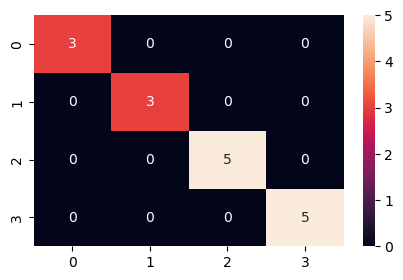

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           0.97        61
   macro avg       0.78      0.80      0.79        61
weighted avg       0.94      0.97      0.95        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [54]:
model_building(RandomForestClassifier(criterion='entropy',max_depth=4,max_features=0.25,min_samples_split=4,n_estimators=150),X_cub,'Rforest_cub')

In [55]:
#tuning(RandomForestClassifier(),params,X_tfuni)

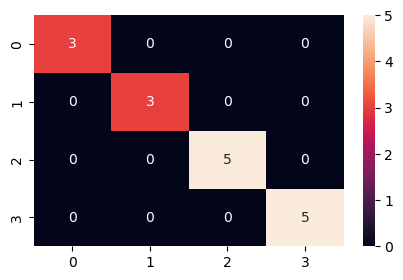

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           0.98        61
   macro avg       0.99      0.90      0.93        61
weighted avg       0.98      0.98      0.98        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [56]:
model_building(RandomForestClassifier(criterion='entropy',max_depth=4,max_features=0.25,min_samples_split=3,n_estimators=50),X_tfuni,'Rforest_tfuni')

In [57]:
#tuning(RandomForestClassifier(),params,X_tfbi)

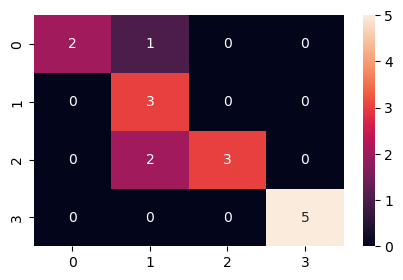

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.50      1.00      0.67         3
           3       1.00      0.60      0.75         5
           4       1.00      1.00      1.00         5

    accuracy                           0.81        

In [58]:
model_building(RandomForestClassifier(criterion='entropy',max_depth=8,max_features=1.0,min_samples_split=2,n_estimators=50),X_tfbi,'Rforest_tfbi')

In [59]:
#tuning(RandomForestClassifier(),params,X_tfub)

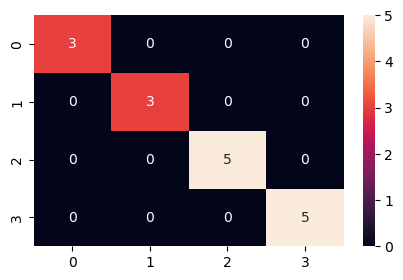

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [60]:
model_building(RandomForestClassifier(criterion='entropy',max_depth=4,max_features=0.5,min_samples_split=3,n_estimators=50),X_tfub,'Rforest_tfub')

### XGBoost

In [61]:
xgbparams={"learning_rate"    : [0.05, 0.15, 0.30] ,
 "max_depth"        : [ 3, 6, 10, 12, 15],
 "min_child_weight" : [ 1, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2],
 "colsample_bytree" : [ 0.3, 0.5 , 0.7 ] }

In [62]:
#tuning(XGBClassifier(),xgbparams,X_cuni)

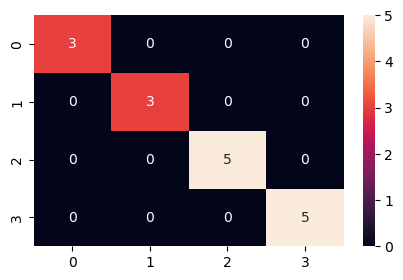

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [63]:
model_building(XGBClassifier(colsample_bytree= 0.3,gamma= 0.0,learning_rate= 0.05,max_depth= 3,min_child_weight= 1),X_cuni,'XGB_cuni')

In [64]:
#tuning(XGBClassifier(),xgbparams,X_cbi)

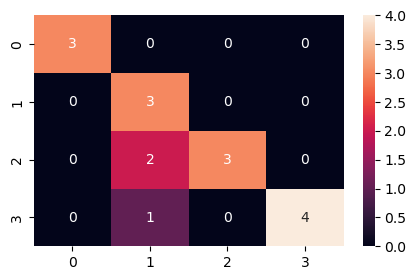

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.88      0.94        17
           2       0.74      1.00      0.85        17
           3       1.00      0.78      0.88         9
           4       1.00      1.00      1.00        16

    accuracy                           0.90        61
   macro avg       0.75      0.73      0.73        61
weighted avg       0.89      0.90      0.89        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.50      1.00      0.67         3
           3       1.00      0.60      0.75         5
           4       1.00      0.80      0.89         5

    accuracy                           0.81        

In [65]:
model_building(XGBClassifier(colsample_bytree=0.3,gamma=0.0,learning_rate= 0.05,max_depth= 3,min_child_weight= 1),X_cbi,'XGB_cbi')

In [66]:
#tuning(XGBClassifier(),xgbparams,X_cub)

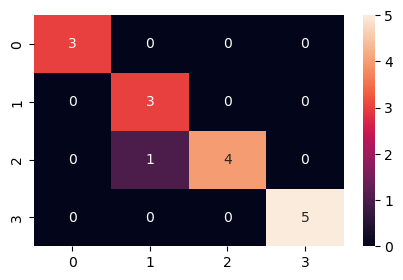

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5

    accuracy                           0.94        

In [67]:
model_building(XGBClassifier(colsample_bytree=0.5,gamma= 0.0,learning_rate=0.15,max_depth= 3,min_child_weight= 1),X_cub,'XGB_cub')

In [68]:
#tuning(XGBClassifier(),xgbparams,X_tfuni)

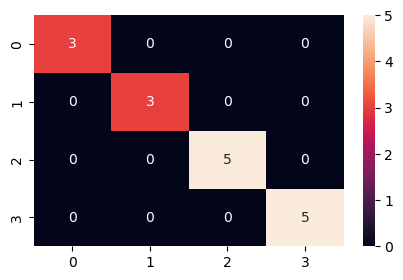

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [69]:
model_building(XGBClassifier(colsample_bytree=0.3,gamma= 0.0,learning_rate=0.05,max_depth= 3,min_child_weight= 1),X_tfuni,'XGB_tfuni')

In [70]:
#tuning(XGBClassifier(),xgbparams,X_tfbi)

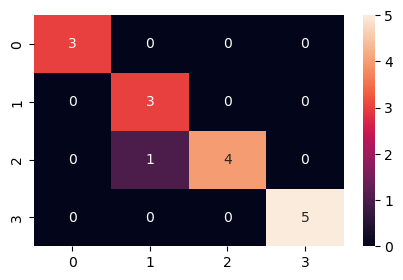

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5

    accuracy                           0.94        

In [71]:
model_building(XGBClassifier(colsample_bytree=0.3,gamma= 0.0,learning_rate=0.05,max_depth= 3,min_child_weight= 1),X_tfbi,'XGB_tfbi')

In [72]:
#tuning(XGBClassifier(),xgbparams,X_tfub)

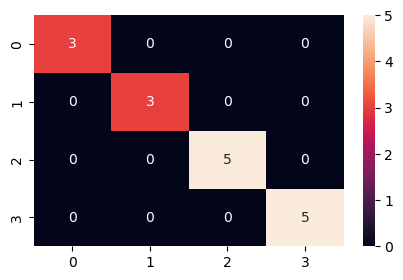

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [73]:
model_building(XGBClassifier(colsample_bytree=0.3,gamma= 0.0,learning_rate=0.05,max_depth= 3,min_child_weight= 1),X_tfub,'XGB_tfub')

### Naive bayers classifier

In [74]:
param_Naive= {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

In [75]:
#tuning(MultinomialNB(),param_Naive,X_cuni)

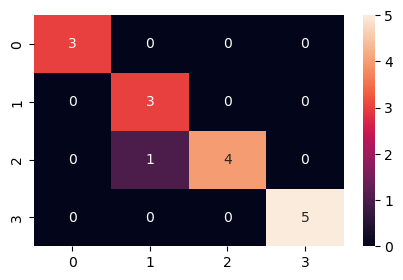

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5

    accuracy                           0.94        

In [76]:
model_building(MultinomialNB(alpha=0.1),X_cuni,'Naive_cuni')

In [77]:
#tuning(MultinomialNB(),param_Naive,X_cbi)

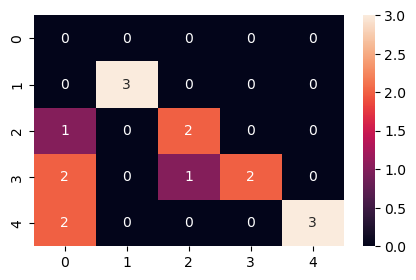

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         3
           2       0.67      0.67      0.67         3
           3       1.00      0.40      0.57         5
           4       1.00      0.60      0.75         

In [78]:
model_building(MultinomialNB(alpha=1.0),X_cbi,'Naive_cbi')

In [79]:
#tuning(MultinomialNB(),param_Naive,X_cub)

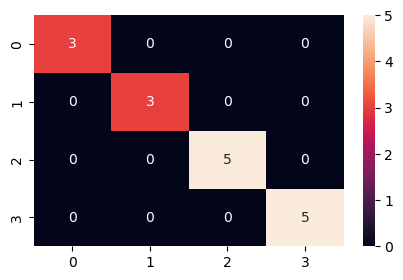

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [80]:
model_building(MultinomialNB(alpha=0.5),X_cub,'Naive_cub')

In [81]:
#tuning(MultinomialNB(),param_Naive,X_tfuni)

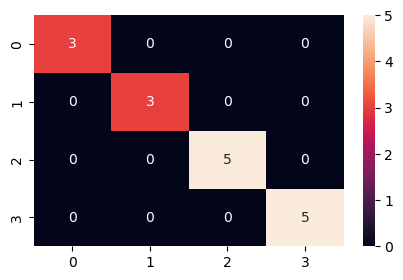

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [82]:
model_building(MultinomialNB(alpha=0.1),X_tfuni,'Naive_tfuni')

In [83]:
#tuning(MultinomialNB(),param_Naive,X_tfbi)

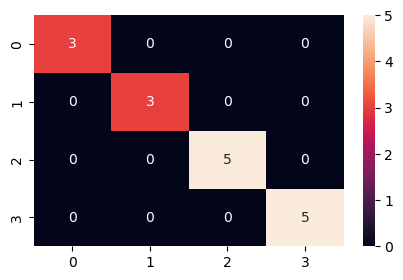

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [84]:
model_building(MultinomialNB(alpha=0.1),X_tfbi,'Naive_tfbi')

In [85]:
#tuning(MultinomialNB(),param_Naive,X_tfub)

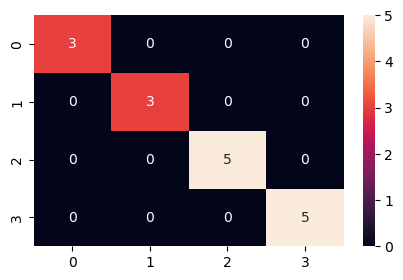

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [86]:
model_building(MultinomialNB(alpha=0.1),X_tfub,'Naive_tfub')

(0.0, 1.3)

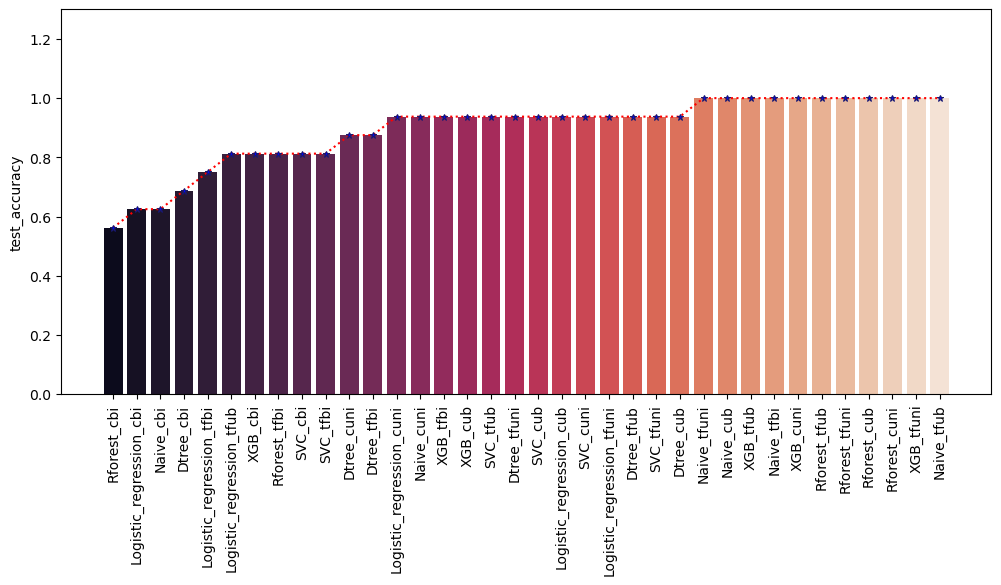

In [87]:
plt.figure(figsize=(12,5))
sns.barplot(data=result.transpose().sort_values(by='test_accuracy'),x=result.transpose().sort_values(by='test_accuracy').index,y='test_accuracy',palette='rocket')
sns.lineplot(data=result.transpose().sort_values(by='test_accuracy'),x=result.transpose().sort_values(by='test_accuracy').index,y='test_accuracy',linestyle='dotted',marker='*',markersize=5,markerfacecolor='blue',markeredgecolor='midnightblue',color='red')
plt.tick_params(axis='x',labelrotation=90)
plt.ylim(top=1.3)

In [88]:
result_final=result.transpose()

In [89]:
result_final

,train_accuracy,train_precision,train_recall,train_f1score,test_accuracy,test_precision,test_recall,test_f1score
Logistic_regression_cuni,1.000000,1.000000,1.000000,1.000000,0.9375,0.937500,0.950000,0.936508
Logistic_regression_cbi,1.000000,1.000000,1.000000,1.000000,0.6250,0.833333,0.700000,0.645833
Logistic_regression_cub,1.000000,1.000000,1.000000,1.000000,0.9375,0.937500,0.950000,0.936508
Logistic_regression_tfuni,0.967213,0.778947,0.800000,0.788889,0.9375,0.937500,0.950000,0.936508
Logistic_regression_tfbi,0.967213,0.778947,0.800000,0.788889,0.7500,0.857143,0.800000,0.733333
Logistic_regression_tfub,0.967213,0.778947,0.800000,0.788889,0.8125,0.875000,0.850000,0.809524
Dtree_cuni,1.000000,1.000000,1.000000,1.000000,0.8750,0.900000,0.900000,0.881944
Dtree_cbi,1.000000,1.000000,1.000000,1.000000,0.6875,0.773810,0.750000,0.712500
Dtree_cub,1.000000,1.000000,1.000000,1.000000,0.9375,0.937500,0.950000,0.936508
Dtree_tfuni,1.000000,1.000000,1.000000,1.000000,0.9375,0.800000,0.733333,0.760000


In [90]:
result_final[(result_final==1.0).all(axis=1)]

,train_accuracy,train_precision,train_recall,train_f1score,test_accuracy,test_precision,test_recall,test_f1score
Rforest_cuni,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Rforest_tfub,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
XGB_cuni,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
XGB_tfuni,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
XGB_tfub,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Naive_cub,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Naive_tfuni,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Naive_tfbi,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Naive_tfub,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Stacking 

#### TFuni

In [91]:
base_models=[('Rforest_tfuni',RandomForestClassifier(criterion='entropy',max_depth=4,max_features=0.25,min_samples_split=3,n_estimators=50)),
            ('XGB_tfuni',XGBClassifier(colsample_bytree=0.3,gamma= 0.0,learning_rate=0.05,max_depth= 3,min_child_weight= 1)),
            ('Naive_tfuni',MultinomialNB(alpha=0.1))]

In [92]:
stacking_model=StackingClassifier(estimators=base_models,final_estimator=LogisticRegression())

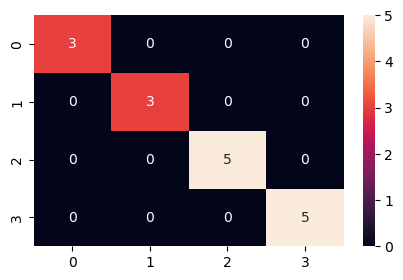

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           0.97        61
   macro avg       0.78      0.80      0.79        61
weighted avg       0.94      0.97      0.95        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [93]:
model_building(StackingClassifier(estimators=base_models,final_estimator=LogisticRegression()),X_tfuni,'Stacking_tfuni')

#### TFub

In [94]:
base_models2=[('Random_tfub',RandomForestClassifier(criterion='entropy',max_depth=4,max_features=0.5,min_samples_split=3,n_estimators=50)),
             ('XGB_tfub',XGBClassifier(colsample_bytree=0.3,gamma= 0.0,learning_rate=0.05,max_depth= 3,min_child_weight= 1)),('Naive_tfub',MultinomialNB(alpha=0.1))]

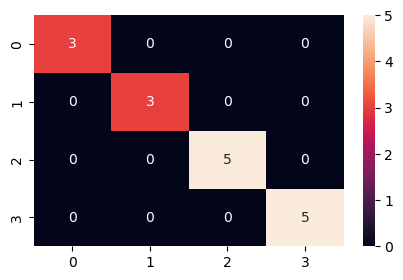

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           0.97        61
   macro avg       0.78      0.80      0.79        61
weighted avg       0.94      0.97      0.95        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [95]:
model_building(StackingClassifier(estimators=base_models2,final_estimator=LogisticRegression()),X_tfub,'Stacking_tfub')

### Voting

#### TFuni

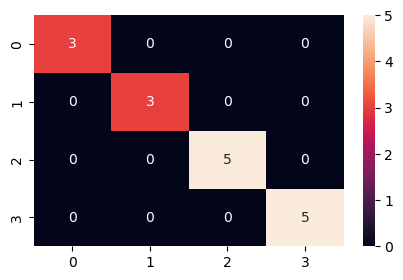

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [96]:
model_building(VotingClassifier(estimators=base_models,voting='hard'),X_tfuni,'Voting_tfuni')

#### Tfub

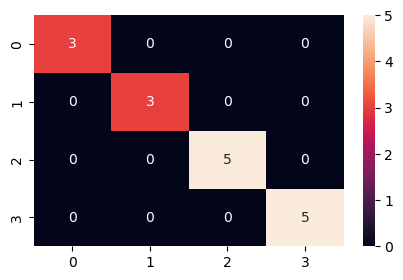

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        

In [97]:
model_building(VotingClassifier(estimators=base_models2,voting='hard'),X_tfub,'Voting_tfub')

In [98]:
result.transpose()

,train_accuracy,train_precision,train_recall,train_f1score,test_accuracy,test_precision,test_recall,test_f1score
Logistic_regression_cuni,1.000000,1.000000,1.000000,1.000000,0.9375,0.937500,0.950000,0.936508
Logistic_regression_cbi,1.000000,1.000000,1.000000,1.000000,0.6250,0.833333,0.700000,0.645833
Logistic_regression_cub,1.000000,1.000000,1.000000,1.000000,0.9375,0.937500,0.950000,0.936508
Logistic_regression_tfuni,0.967213,0.778947,0.800000,0.788889,0.9375,0.937500,0.950000,0.936508
Logistic_regression_tfbi,0.967213,0.778947,0.800000,0.788889,0.7500,0.857143,0.800000,0.733333
Logistic_regression_tfub,0.967213,0.778947,0.800000,0.788889,0.8125,0.875000,0.850000,0.809524
Dtree_cuni,1.000000,1.000000,1.000000,1.000000,0.8750,0.900000,0.900000,0.881944
Dtree_cbi,1.000000,1.000000,1.000000,1.000000,0.6875,0.773810,0.750000,0.712500
Dtree_cub,1.000000,1.000000,1.000000,1.000000,0.9375,0.937500,0.950000,0.936508
Dtree_tfuni,1.000000,1.000000,1.000000,1.000000,0.9375,0.800000,0.733333,0.760000


(0.0, 1.3)

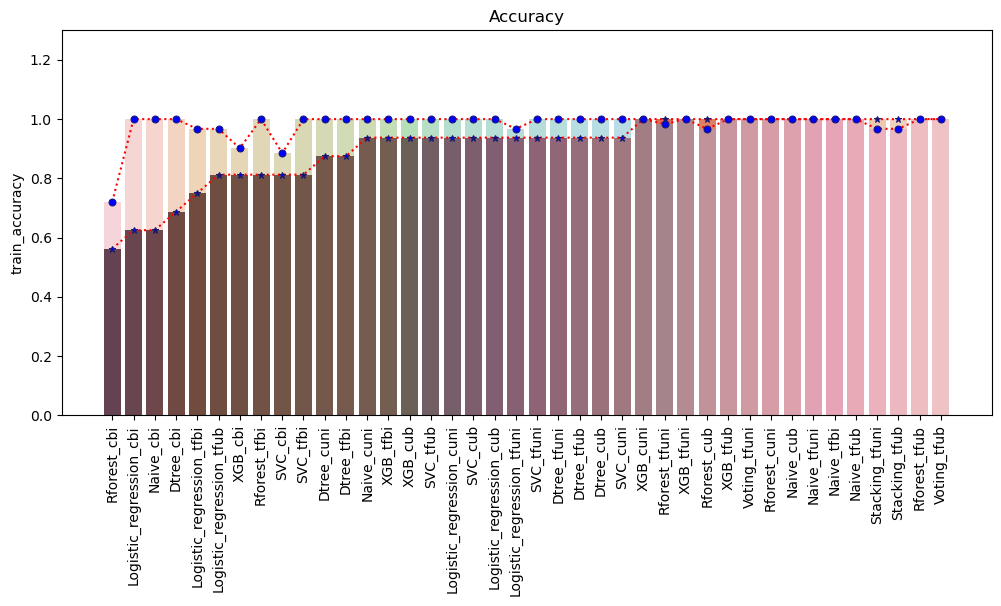

In [124]:
plt.figure(figsize=(12,5))
sns.barplot(data=result.transpose().sort_values(by='test_accuracy'),x=result.transpose().sort_values(by='test_accuracy').index,y='test_accuracy',palette='rocket')
sns.barplot(data=result.transpose().sort_values(by='test_accuracy'),x=result.transpose().sort_values(by='test_accuracy').index,y='train_accuracy',alpha=0.4)
sns.lineplot(data=result.transpose().sort_values(by='test_accuracy'),x=result.transpose().sort_values(by='test_accuracy').index,y='test_accuracy',linestyle='dotted',marker='*',markersize=5,markerfacecolor='blue',markeredgecolor='midnightblue',color='red')
sns.lineplot(data=result.transpose().sort_values(by='test_accuracy'),x=result.transpose().sort_values(by='test_accuracy').index,y='train_accuracy',linestyle='dotted',marker='o',markersize=5,markerfacecolor='blue',markeredgecolor='midnightblue',color='red')
plt.tick_params(axis='x',labelrotation=90)
plt.title('Accuracy')
plt.ylim(top=1.3)

In [100]:
X_tfub

,0,1,2,3,4,5,6,7,8,9,...,24388,24389,24390,24391,24392,24393,24394,24395,24396,24397
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.022342,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.070191,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,0.0,0.0,0.0,0.0,0.0,0.0,0.055079,0.055079,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.017973,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
target

,category_label
0,2
1,2
2,2
3,2
4,2
...,...
72,4
73,4
74,4
75,0


In [102]:
final_model=VotingClassifier(estimators=base_models2,voting='hard').fit(X_tfub,target)

In [103]:
import pickle

In [104]:
pickle.dump(final_model,open('final_model','wb'))